# Real numbers walk

In this notebook I present my pyhton implementation of a way to visualize some cool word clouds. 

To do so, I took some addresses from State of the Union from presidents George Bush (2002, right after 9/11) and the addresses after presidential ellections from Barack Obama and Donald Trump. 

The idea is to plot the wordcloud in two ways: A word cloud with the silhouette of the president and a second one trying to use the original image colors for the words and reproduce the president appearance.

---
#### Created by
**Rennan Danilo Seimetz Chagas** <br>
Industrial Engineer & Optimization <br>
email: chagasrennan@gmail.com 

In [9]:
from wordcloud import WordCloud, ImageColorGenerator
from stop_words import get_stop_words # lib provides stopwords 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as dp

# Addresses state of the union
# Bush 2002 - After 9/11
# Obama 2009 - After 1st election
# Trump 2017 - After 1st election

def plotmask(name):

    # Read the whole text.
    text = open('address/'+ name +'.txt',encoding='utf8').read()

    stopwords = get_stop_words('en')

    # Create mask with president picture
    masky = np.array(Image.open('presidentmask/' + name + '.png'))

    # Generate a word cloud constructor
    wc = WordCloud(stopwords=stopwords,
                   background_color='white',
                   mask=masky,
                   contour_width=5,
                   contour_color='steelblue',
                   random_state=42,
                  font_path='Times')

    # geenrate cloud object with text
    wc.generate(text)
    
    # export png file
    wc.to_file(name +'.png')
 
def plotcolor(name):
    # Read the whole text.
    text = open('address/'+ name +'.txt',encoding='utf8').read()

    stopwords = get_stop_words('en')

    # Create mask with colored president picture
    president_coloring = np.array(Image.open('presidentmask/' + name + '_color.png'))

    # create coloring from image
    image_colors = ImageColorGenerator(president_coloring)

    # Generate a word cloud image
    wc = WordCloud(stopwords=stopwords,
                   background_color='white',
                   mask=president_coloring,
                   color_func = image_colors,
                   max_words=1000,
                   max_font_size=60,
                   random_state=42,
                  font_path='Times')

    wc.generate(text)

    wc.to_file(name + '_color.png')

In [4]:
presidents = ['Bush','Obama','Trump']

for pres in presidents:
    plotmask(pres)
    plotcolor(pres)

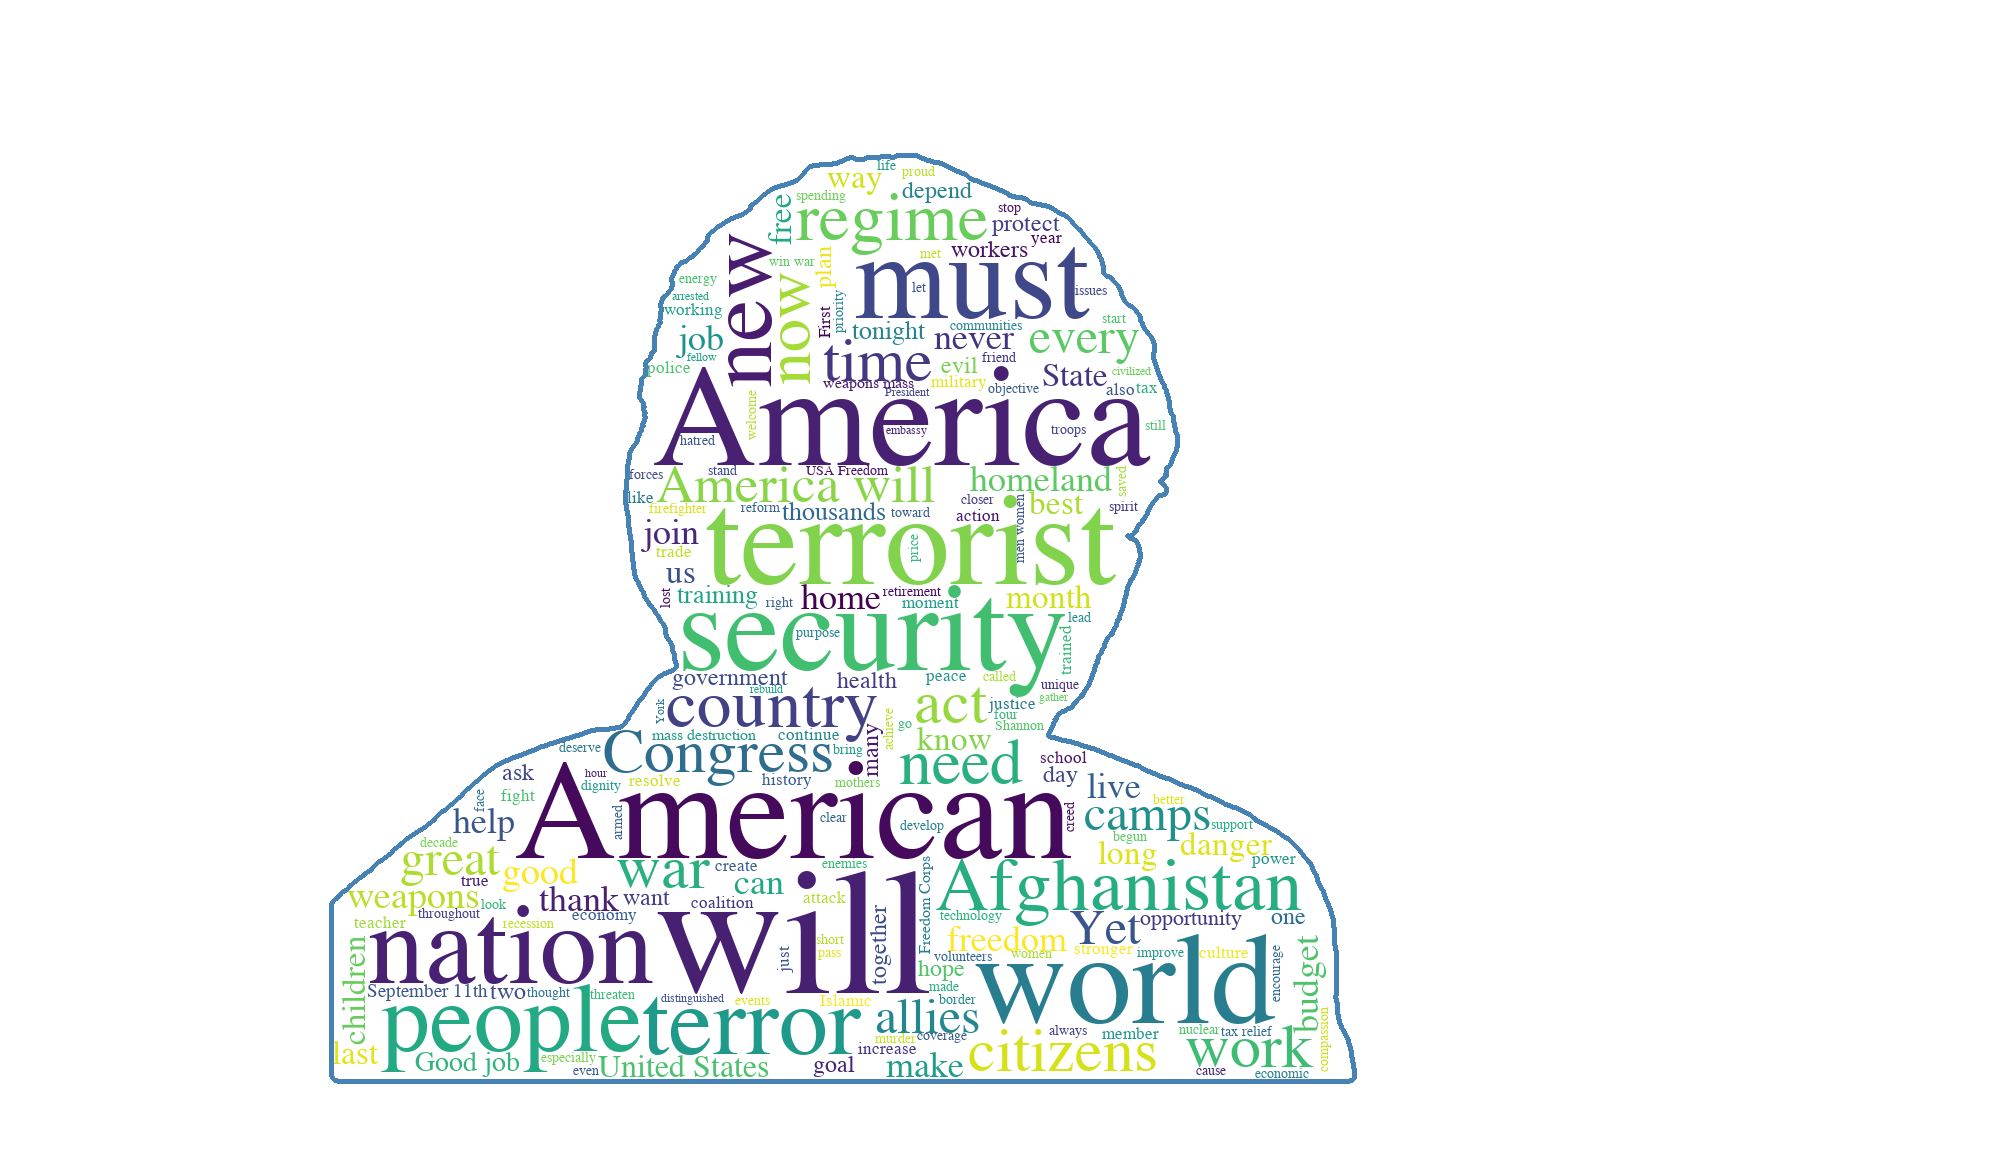

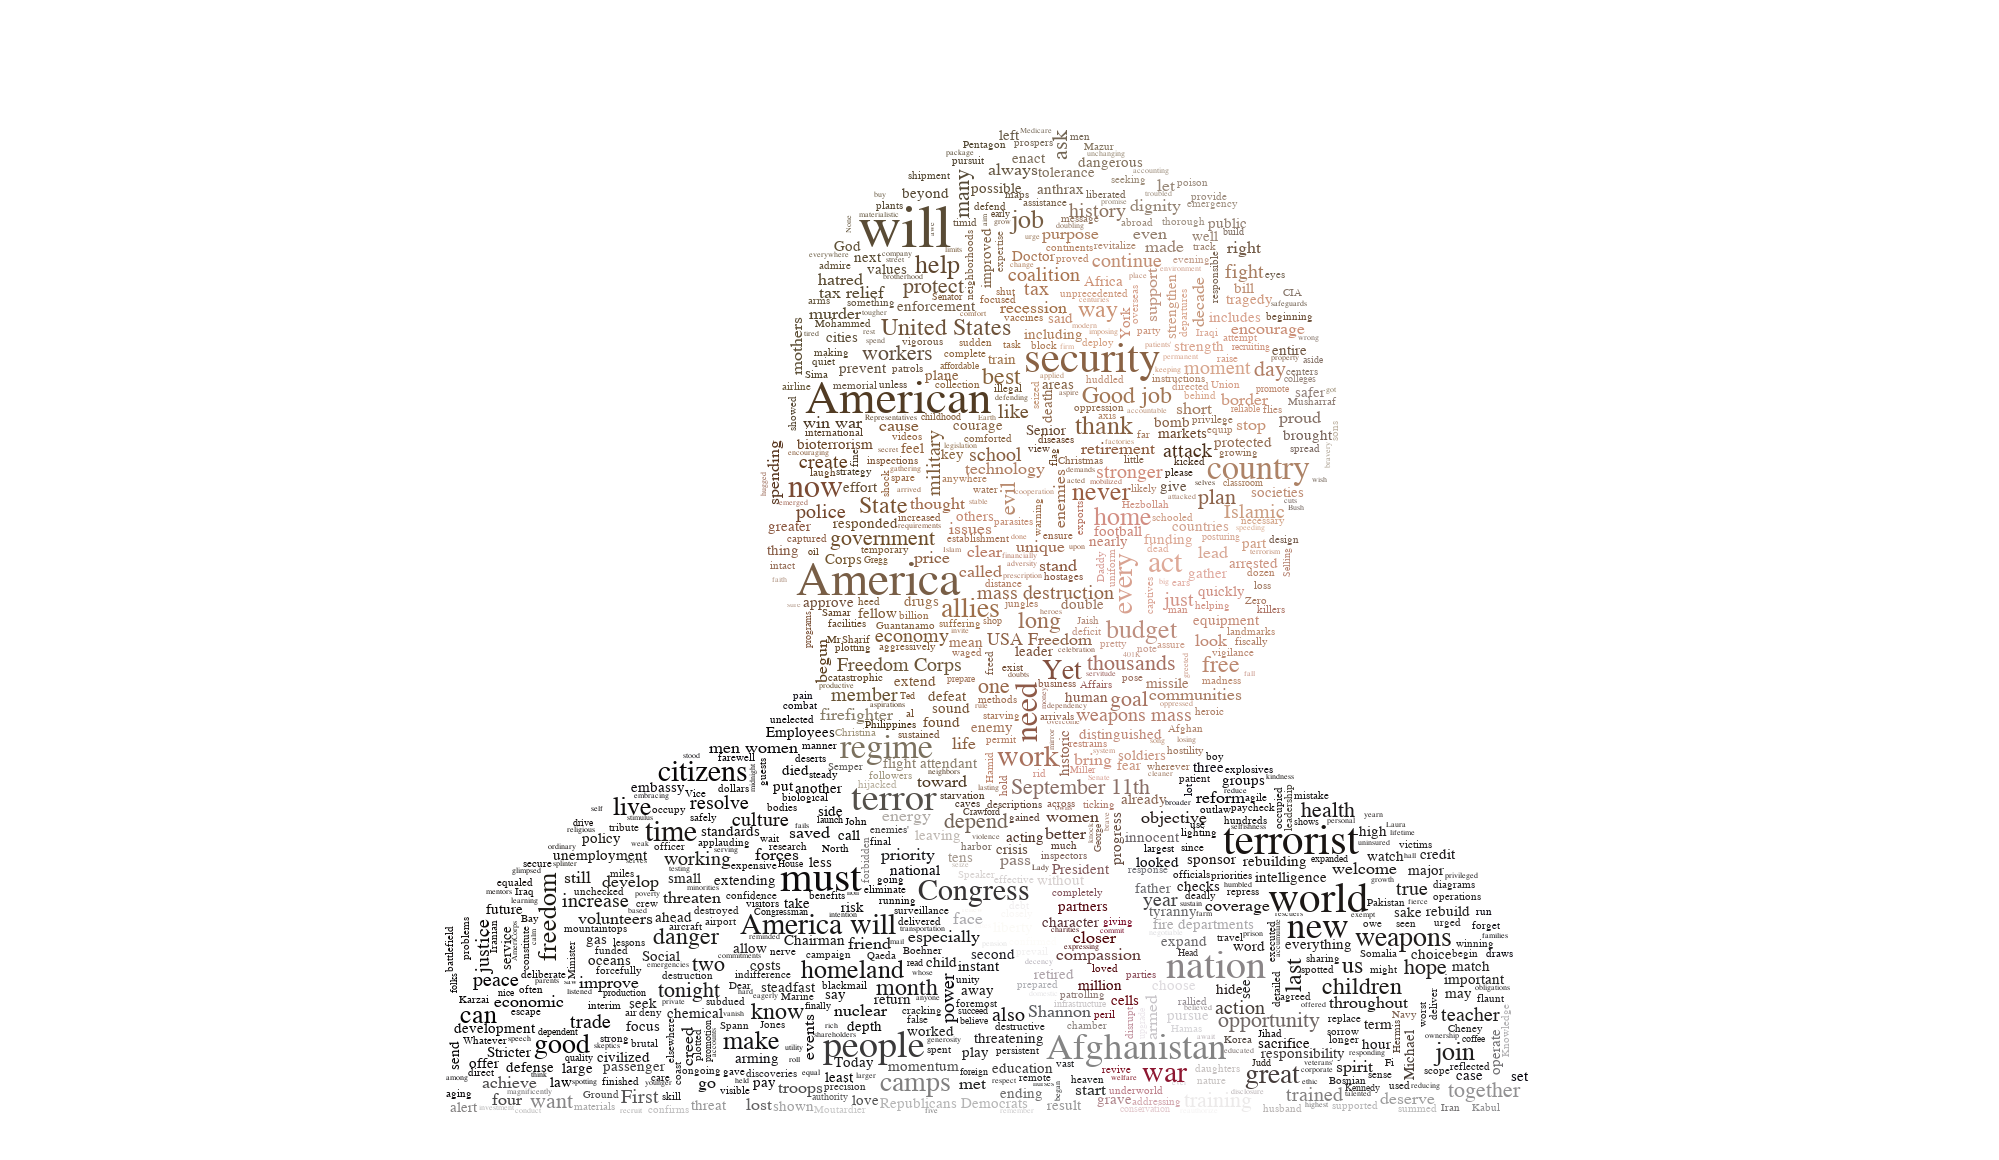

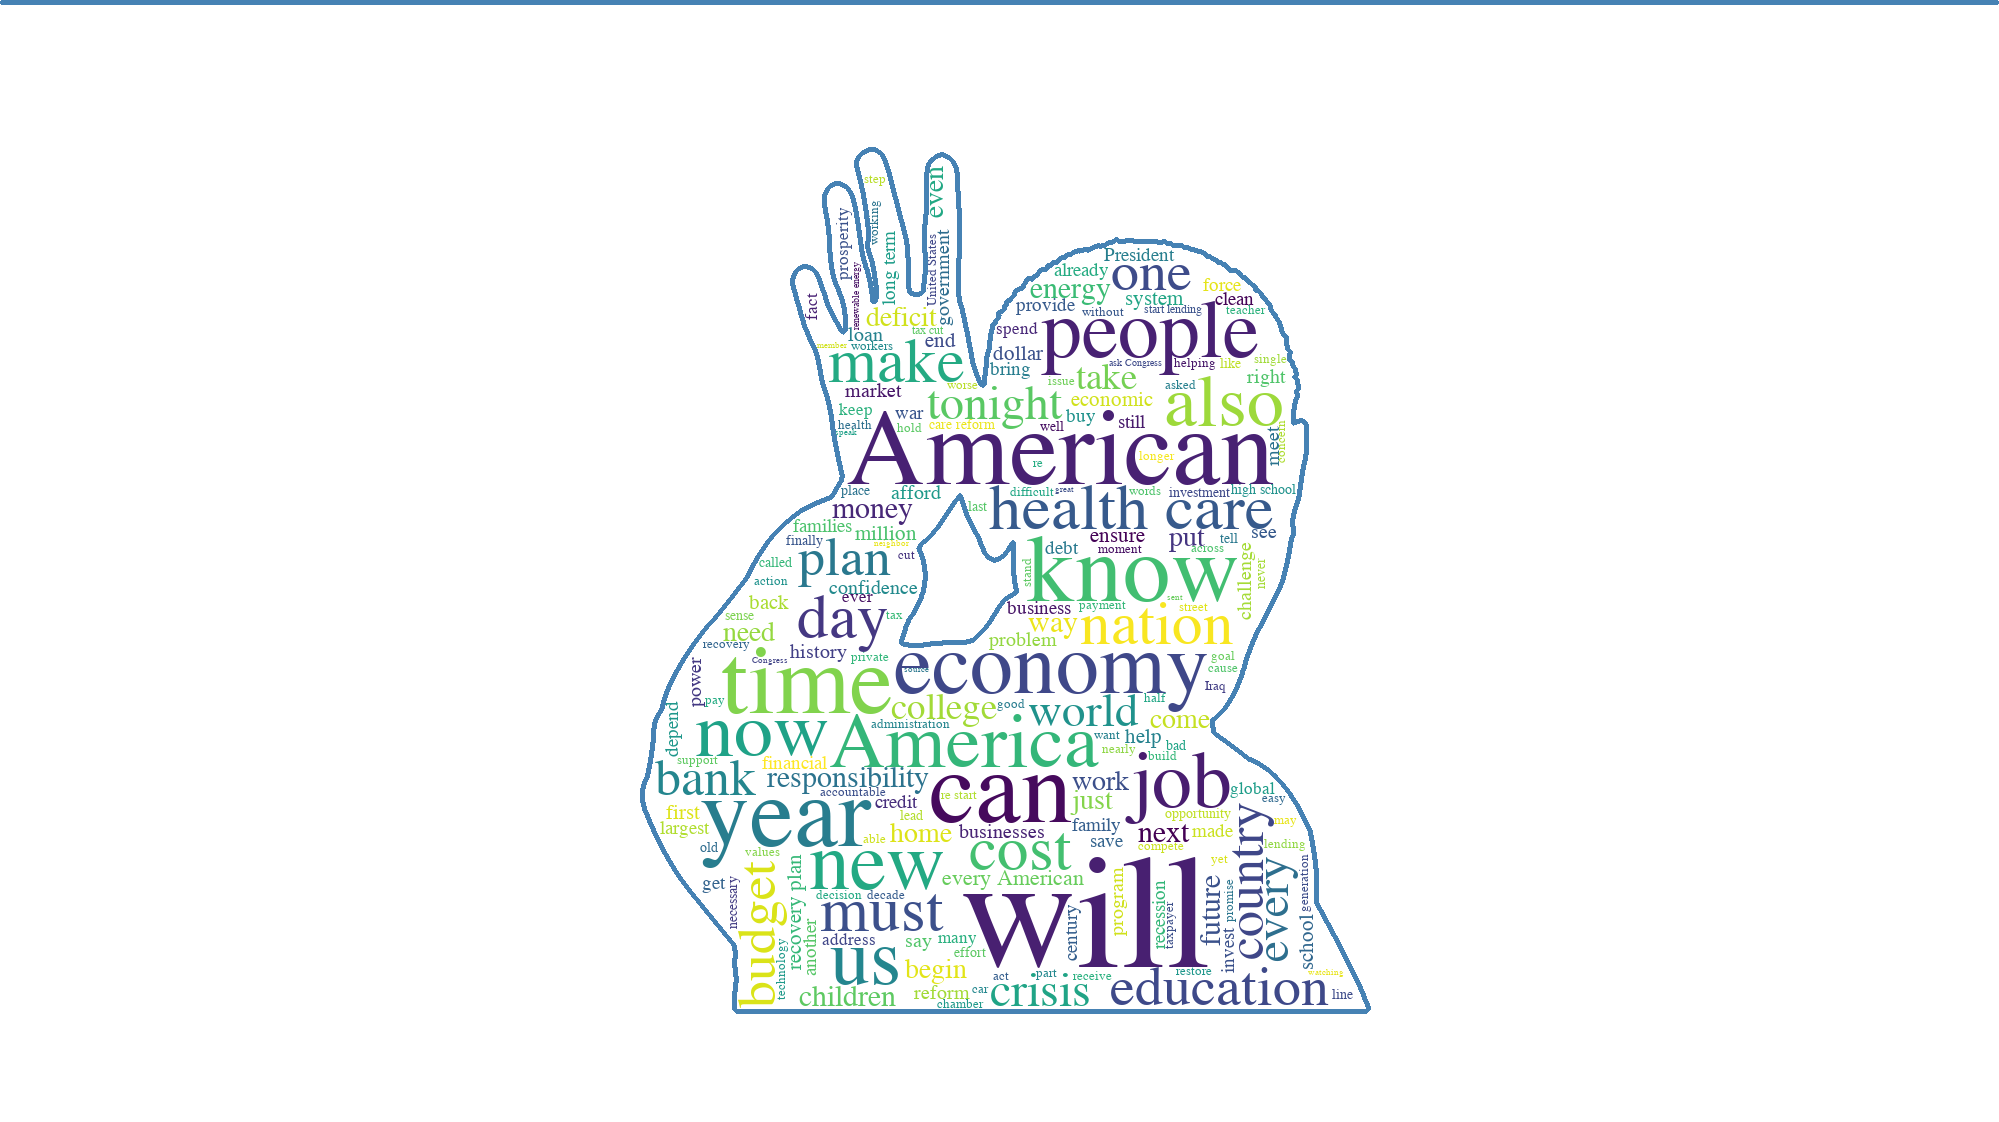

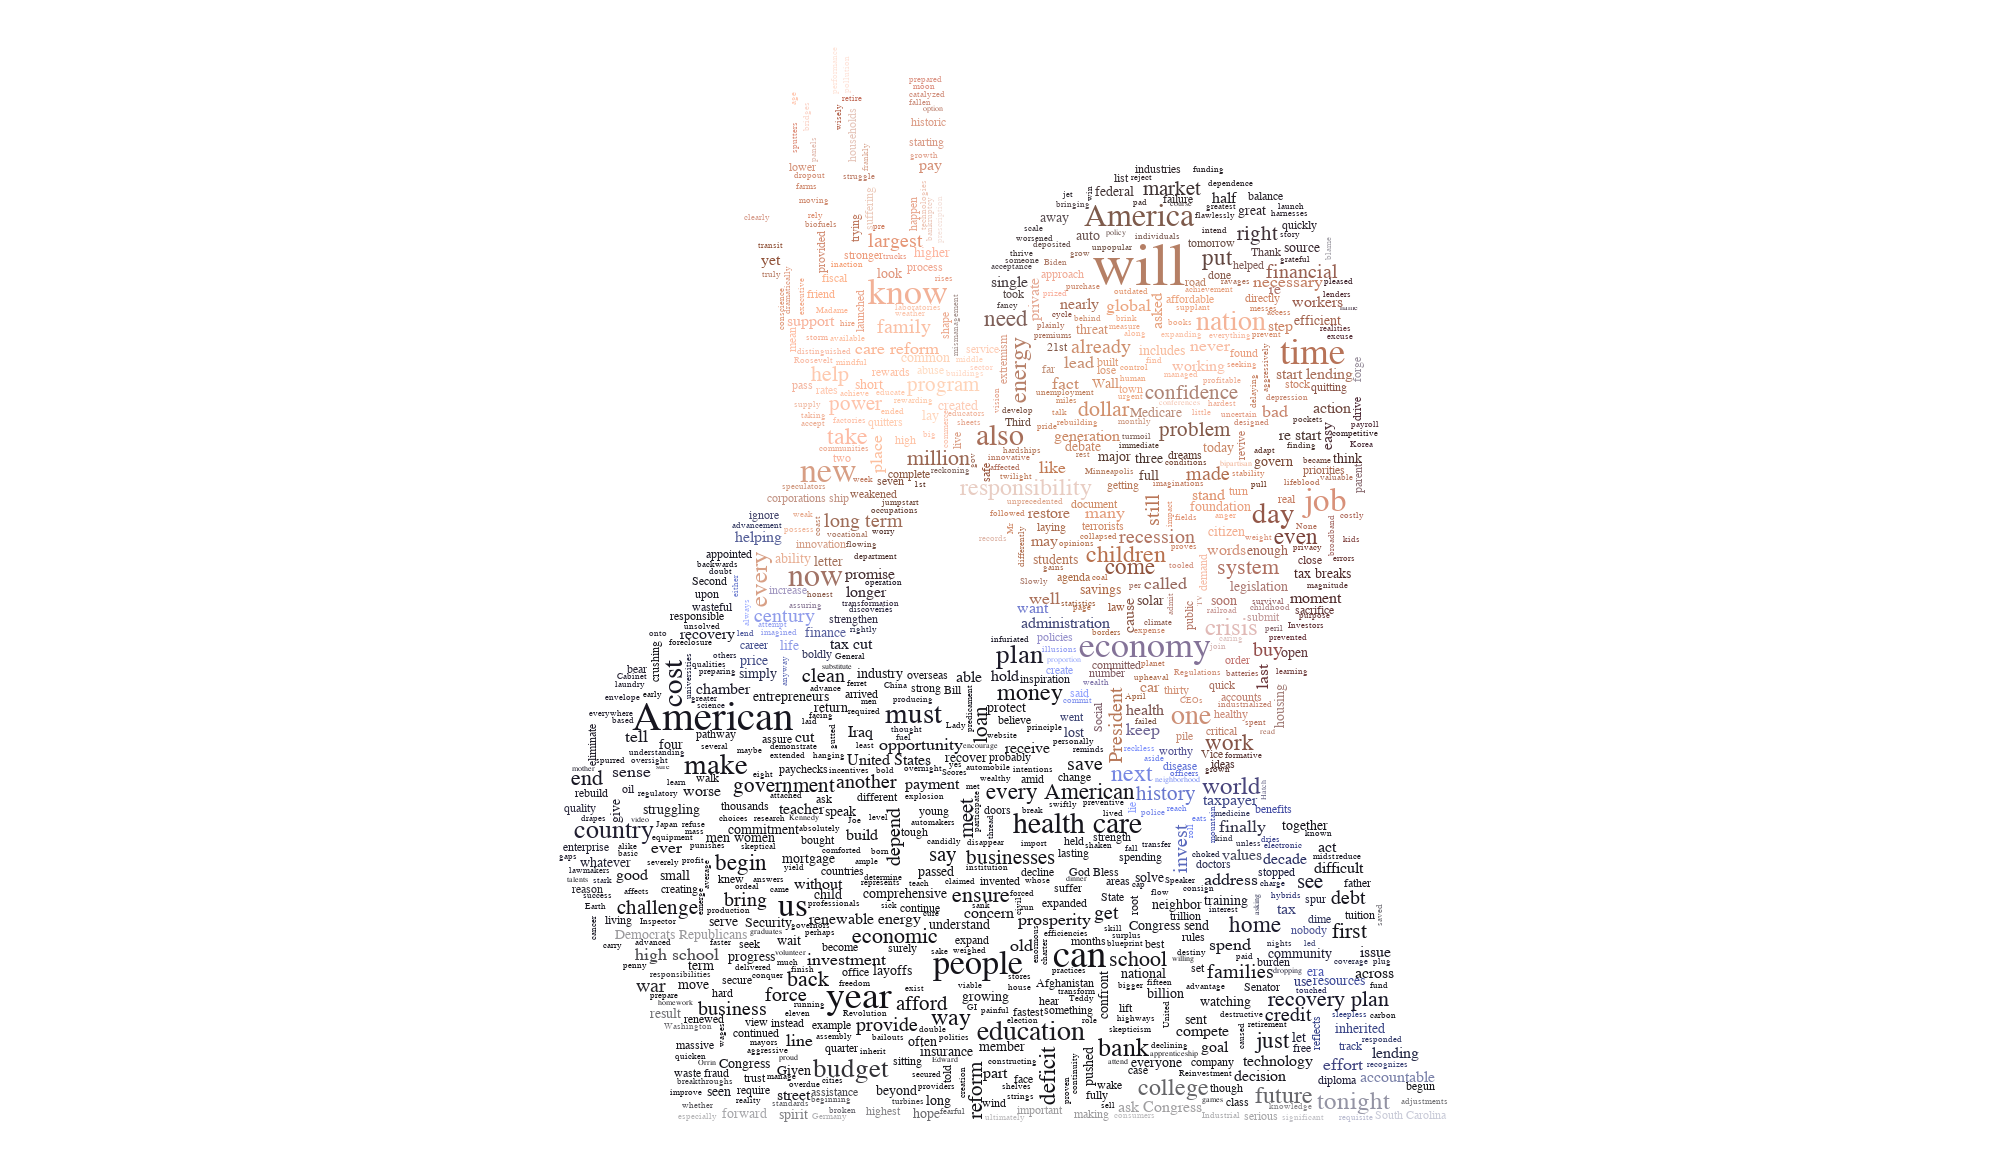

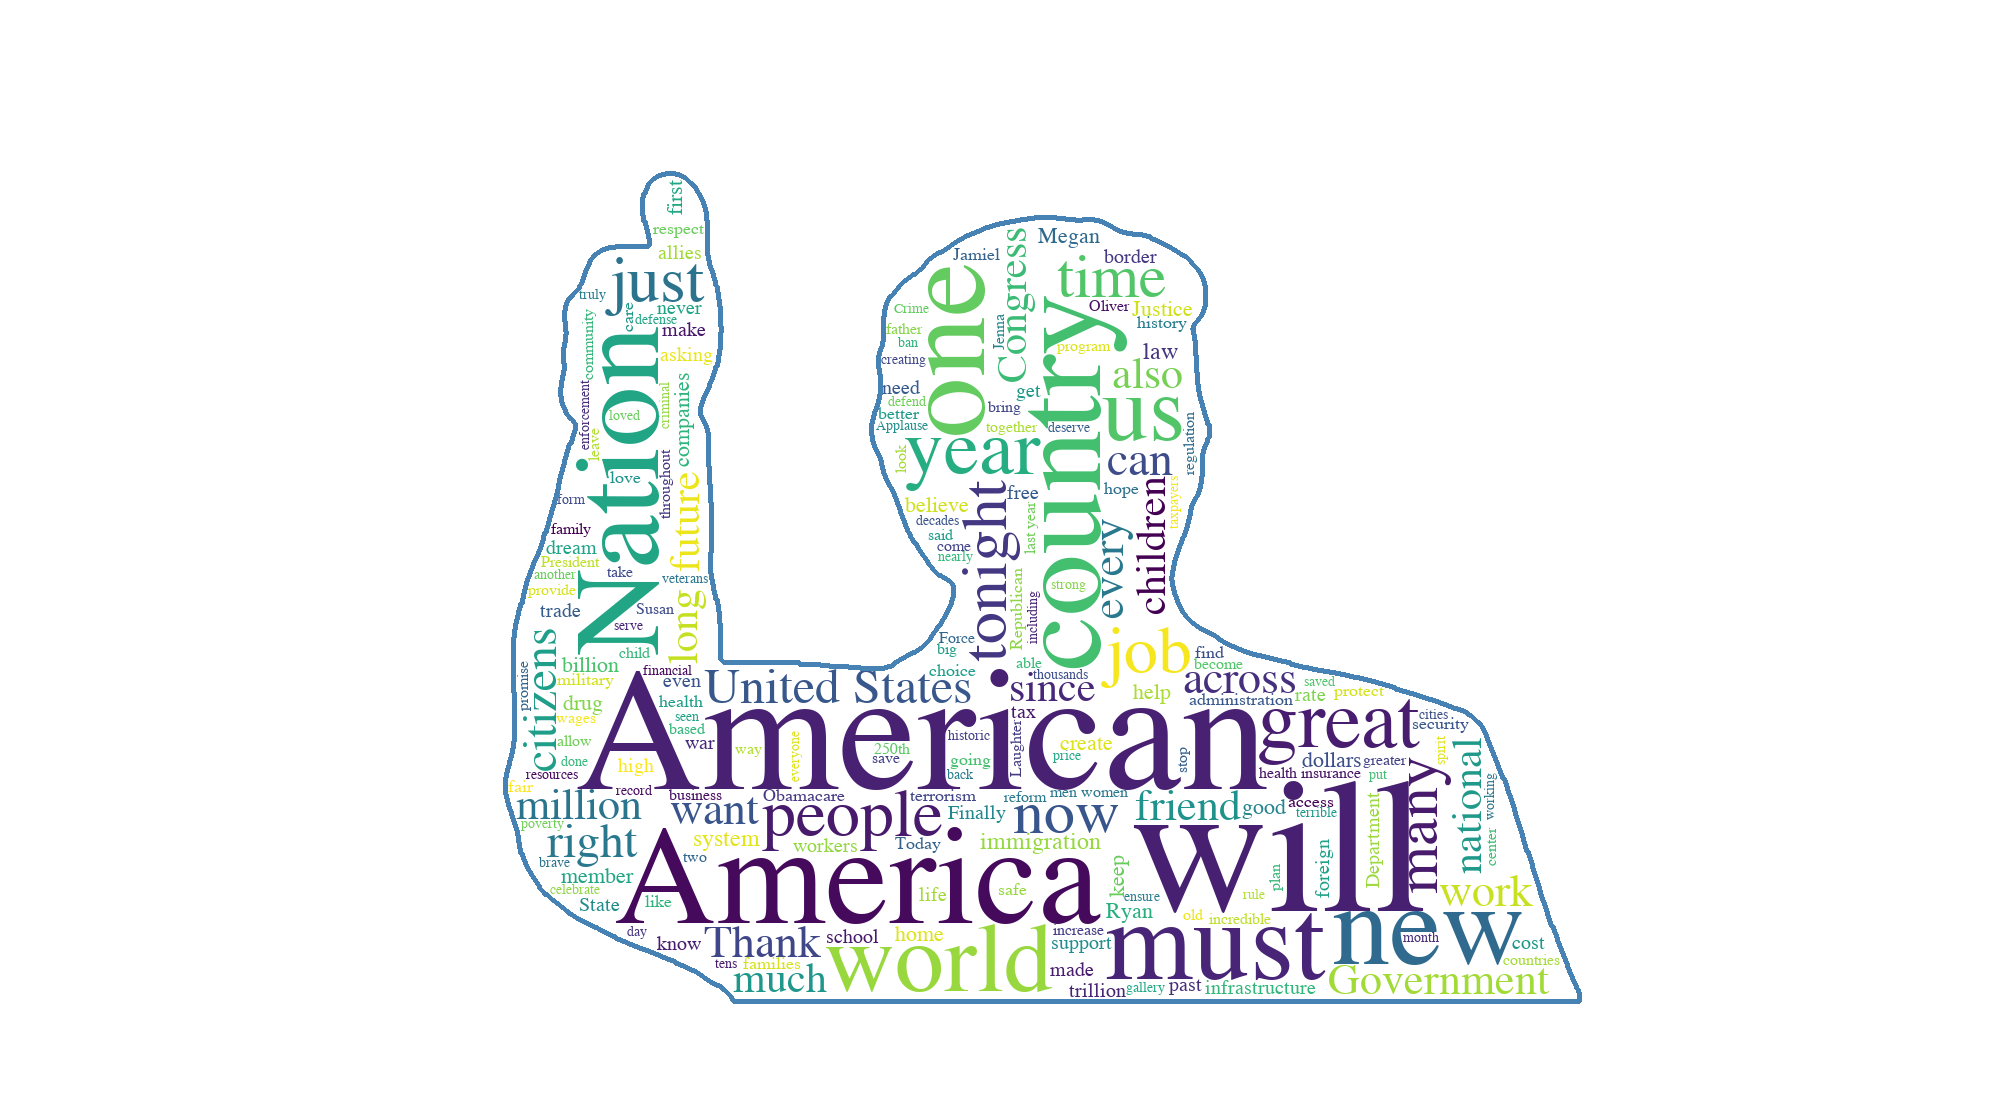

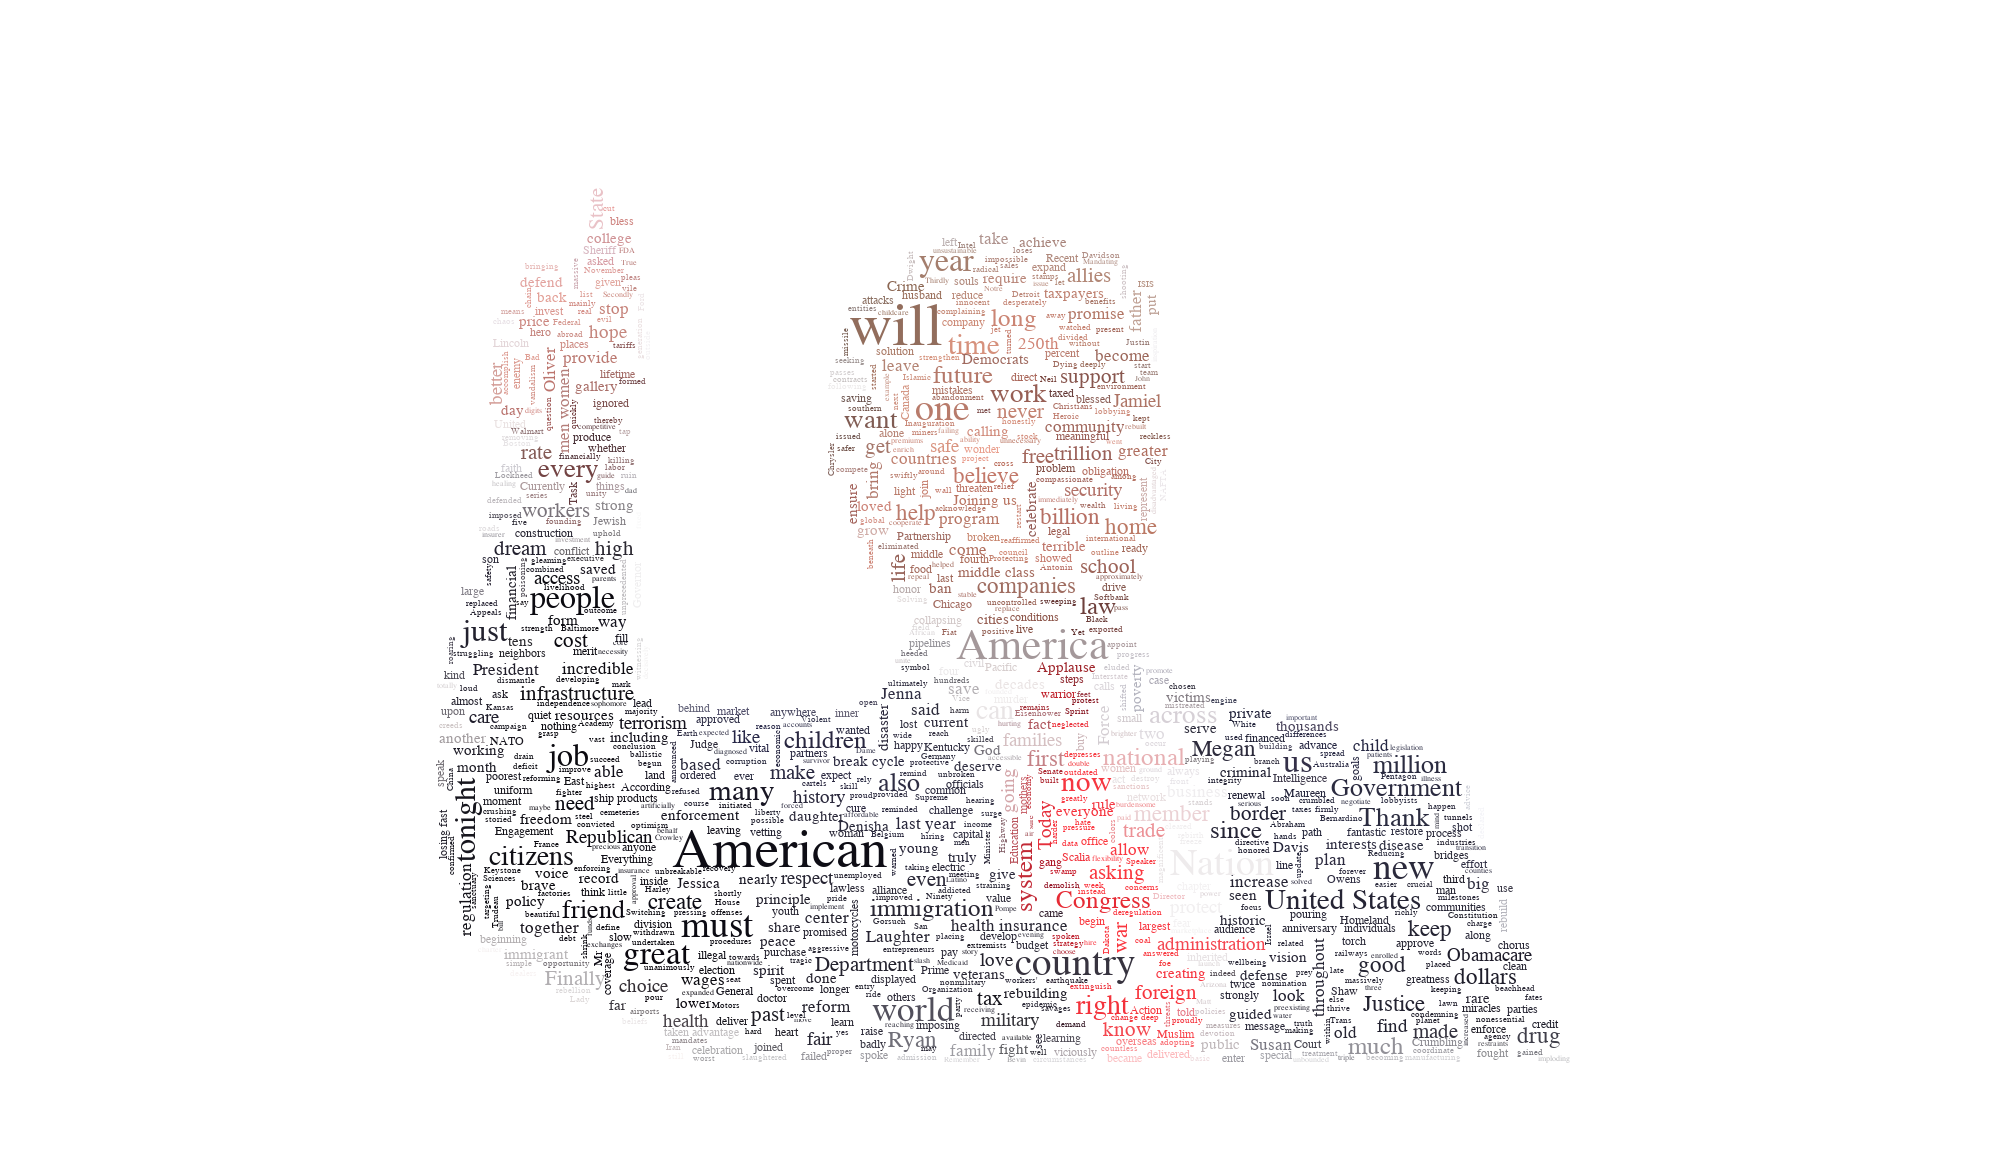

In [14]:
images = []
for pres in presidents:
    images.append(dp.Image(filename= pres + '.png', format='png'))
    images.append(dp.Image(filename= pres + '_color.png', format='png'))
    
# display all images
for ea in images:
    dp.display_png(ea)